In [2]:
import yfinance as yf

In [3]:
#download stock price from yahoo fianace api 
sp500=yf.Ticker("^GSPC")

In [5]:
#download historical data of the stock
sp500=sp500.history(period="max")

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-07-08,3888.260010,3918.500000,3869.340088,3899.379883,2844620000,0,0
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,0,0
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,0,0,0


In [7]:
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-06-30', '2022-07-01', '2022-07-05', '2022-07-06',
               '2022-07-07', '2022-07-08', '2022-07-11', '2022-07-12',
               '2022-07-13', '2022-07-14'],
              dtype='datetime64[ns]', name='Date', length=18251, freq=None)

<AxesSubplot:xlabel='Date'>

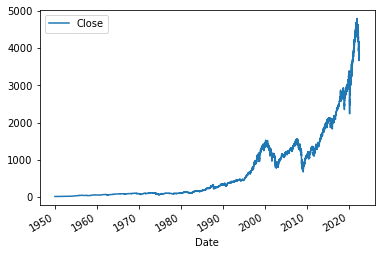

In [9]:
#cleaning and visualizing our sp500 stock markert data
sp500.plot.line(y="Close",use_index=True)

In [14]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Stock Splits'], dtype='object')

In [15]:
#remove extra clolumns we dont need like Dividends,Stock Splits 
del sp500["Stock Splits"]

In [16]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000
...,...,...,...,...,...
2022-07-08,3888.260010,3918.500000,3869.340088,3899.379883,2844620000
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,0


In [17]:
#setting up our target machine learning our target will be will our stock will be up or down by tommorow
#so we creat a new column called tommporow and we will shift the close price one day by using panadas shift method

In [19]:
sp500["Tomorow"]=sp500["Close"].shift(-1)

In [20]:
sp500

,Open,High,Low,Close,Volume,Tomorow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-07-08,3888.260010,3918.500000,3869.340088,3899.379883,2844620000,3854.429932
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,3818.800049
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,0,3801.780029


In [22]:
sp500["Target"]=(sp500["Tomorow"]>sp500["Close"])

In [24]:
sp500["Target"]=sp500["Target"].astype(int)

In [25]:
sp500

,Open,High,Low,Close,Volume,Tomorow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-07-08,3888.260010,3918.500000,3869.340088,3899.379883,2844620000,3854.429932,0
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,3818.800049,0
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,0,3801.780029,0


In [26]:
#we will remove datas that our out dated so only take datas satrting from 1990
sp500=sp500.loc["1990-01-01":].copy()

In [27]:
sp500

,Open,High,Low,Close,Volume,Tomorow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-07-08,3888.260010,3918.500000,3869.340088,3899.379883,2844620000,3854.429932,0
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3023830000,3818.800049,0
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,0,3801.780029,0


In [30]:
sp500.corr()

,Open,High,Low,Close,Volume,Tomorow,Target
Open,1.000000,0.999940,0.999908,0.999845,0.558501,0.999659,0.003572
High,0.999940,1.000000,0.999877,0.999917,0.560002,0.999721,0.003242
Low,0.999908,0.999877,1.000000,0.999925,0.556218,0.999730,0.003388
Close,0.999845,0.999917,0.999925,1.000000,0.558042,0.999782,0.002863
Volume,0.558501,0.560002,0.556218,0.558042,1.000000,0.558101,0.013358
Tomorow,0.999659,0.999721,0.999730,0.999782,0.558101,1.000000,0.014892
Target,0.003572,0.003242,0.003388,0.002863,0.013358,0.014892,1.000000


In [28]:
#now lets start training our ML model lets start with random forest 
from sklearn.ensemble import RandomForestClassifier

In [29]:
model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)

In [31]:
#now lets divide our data to train test split since this is time serious data so we dont use cross validation 
#so lets take allthe rows except the last 100 to train and the last 100 to test

train=sp500.iloc[:-100]
test=sp500.iloc[-100:]

In [39]:
pridictors=["Close","Volume","Open","High","Low"]
model.fit(train[pridictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [40]:
from sklearn.metrics import precision_score
preds=model.predict(test[pridictors])

In [42]:
#lets convert presd(array) to serious
import pandas as pd

In [43]:
preds=pd.Series(preds,index=test.index)

In [44]:
preds

Date
2022-02-18    1
2022-02-22    1
2022-02-23    1
2022-02-24    1
2022-02-25    1
             ..
2022-07-08    1
2022-07-11    1
2022-07-12    1
2022-07-13    1
2022-07-14    1
Length: 100, dtype: int32

In [45]:
#now lets calculate pricision score
precision_score(test["Target"],preds)

0.449438202247191

In [48]:
#lest plot our pridicition
combned=pd.concat([test["Target"],preds],axis=1)

<AxesSubplot:xlabel='Date'>

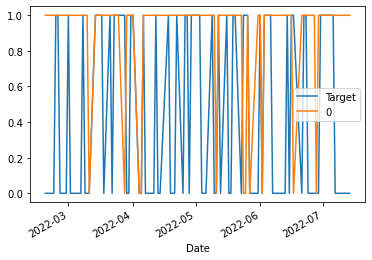

In [51]:
combned.plot()

In [ ]:
#now lets build a backtesting system
 def pre